importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the CSV data as pandas dataframe

In [6]:
df = pd.read_csv('data/diamonds.csv')

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.shape

(53940, 11)

# Dataset Columns :



1) price : price in US dollars ( $326 - $18,823 )

2) carat : weight of the diamond ( 0.2 - 5.01 )

3) cut : quality of the cut ( Fair , Good , Very Good , Premium , Ideal )

4) color : diamond colour, from J ( worst ) to D ( best )

5) clarity : a measurement of how clear the diamond is ( I1 (worst) ,SI2 ,SI1 ,VS2 ,VS1 ,VVS2 ,VVS1 ,IF (best))

6) x : length in mm ( 0 - 10.74 )

7) y : width in mm ( 0 - 58.9 )

8) z : depth in mm ( 0 - 31.8 )

9) depth : total depth percentage = z / mean( x, y ) = 2 * z / ( x + y ) --> ( 43 - 79 )

10) table : width of top of diamond relative to widest point ( 43 - 95 )



# DATA CHECKS TO PERFORM

1) Check missing values

2) check duplicates

3) check data type

4) check the number of unique values of each column

5) check statistics of dataset

6) check various categories present in the different categorical column

In [9]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

no missing values

In [10]:
df.duplicated().sum()

0

no duplicate values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [12]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [14]:
df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [16]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
print("Categories in 'cut' variable:     ",end=" " )
print(df['cut'].unique())

print("Categories in 'color' variable:  ",end=" ")
print(df['color'].unique())

print("Categories in'clarity' variable:",end=" " )
print(df['clarity'].unique())


Categories in 'cut' variable:      ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Categories in 'color' variable:   ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Categories in'clarity' variable: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [21]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [23]:
print(numeric_features)
print(categorical_features)

['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']
['cut', 'color', 'clarity']


In [52]:
df['length'] = df['x']
df['width'] = df['y']
df['depth'] = df['z']

KeyError: 'x'

In [29]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,length,width
0,1,0.23,Ideal,E,SI2,2.43,55.0,326,3.95,3.98,2.43,3.95,3.98
1,2,0.21,Premium,E,SI1,2.31,61.0,326,3.89,3.84,2.31,3.89,3.84
2,3,0.23,Good,E,VS1,2.31,65.0,327,4.05,4.07,2.31,4.05,4.07
3,4,0.29,Premium,I,VS2,2.63,58.0,334,4.20,4.23,2.63,4.20,4.23
4,5,0.31,Good,J,SI2,2.75,58.0,335,4.34,4.35,2.75,4.34,4.35


In [30]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'length', 'width'],
      dtype='object')

In [31]:
df = df.drop(['x','y','z'], axis = 1)

In [32]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length,width
0,1,0.23,Ideal,E,SI2,2.43,55.0,326,3.95,3.98
1,2,0.21,Premium,E,SI1,2.31,61.0,326,3.89,3.84
2,3,0.23,Good,E,VS1,2.31,65.0,327,4.05,4.07
3,4,0.29,Premium,I,VS2,2.63,58.0,334,4.20,4.23
4,5,0.31,Good,J,SI2,2.75,58.0,335,4.34,4.35


In [33]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [34]:
print(numeric_features)
print(categorical_features)

['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'length', 'width']
['cut', 'color', 'clarity']


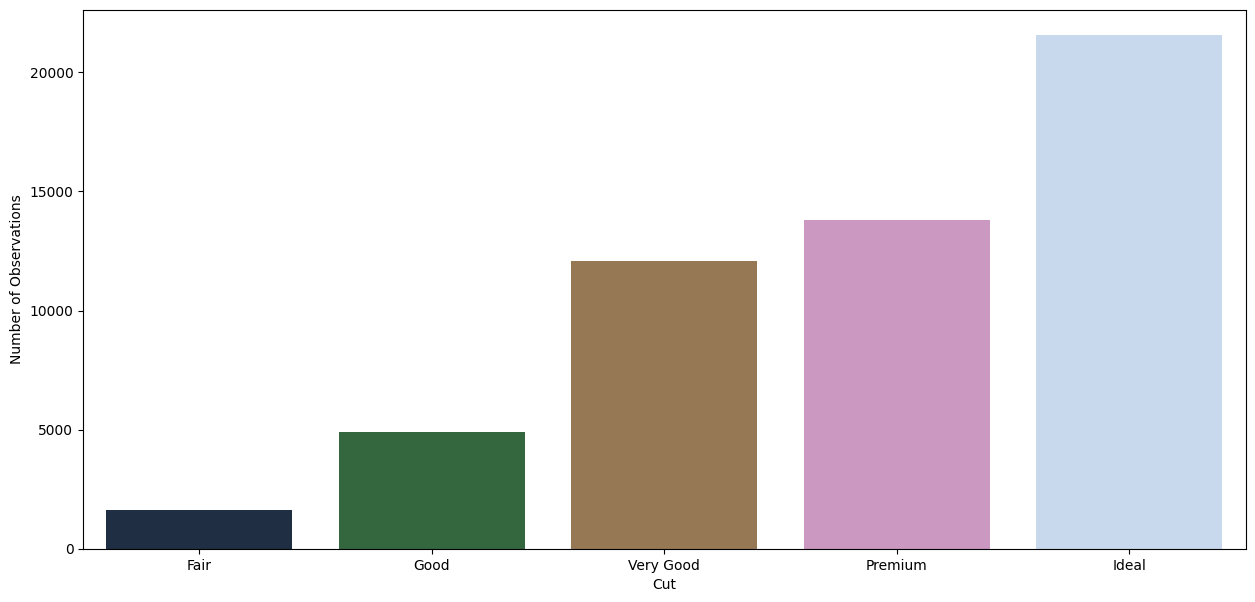

In [37]:
plt.figure(figsize= (15, 7))
sns.countplot(x= "cut", data= df, palette= sns.color_palette("cubehelix", 5),
              order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Number of Observations")
plt.show()

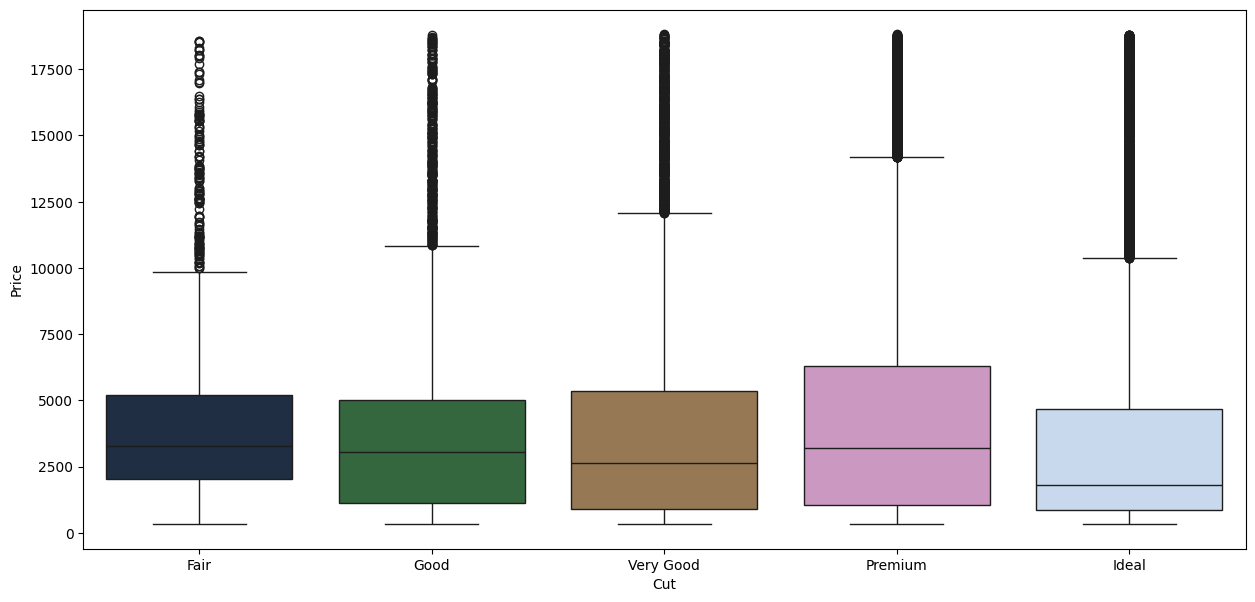

In [38]:
plt.figure(figsize= (15, 7))
sns.boxplot(x= "cut", y= "price", data= df, palette= sns.color_palette("cubehelix", 5),
            order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

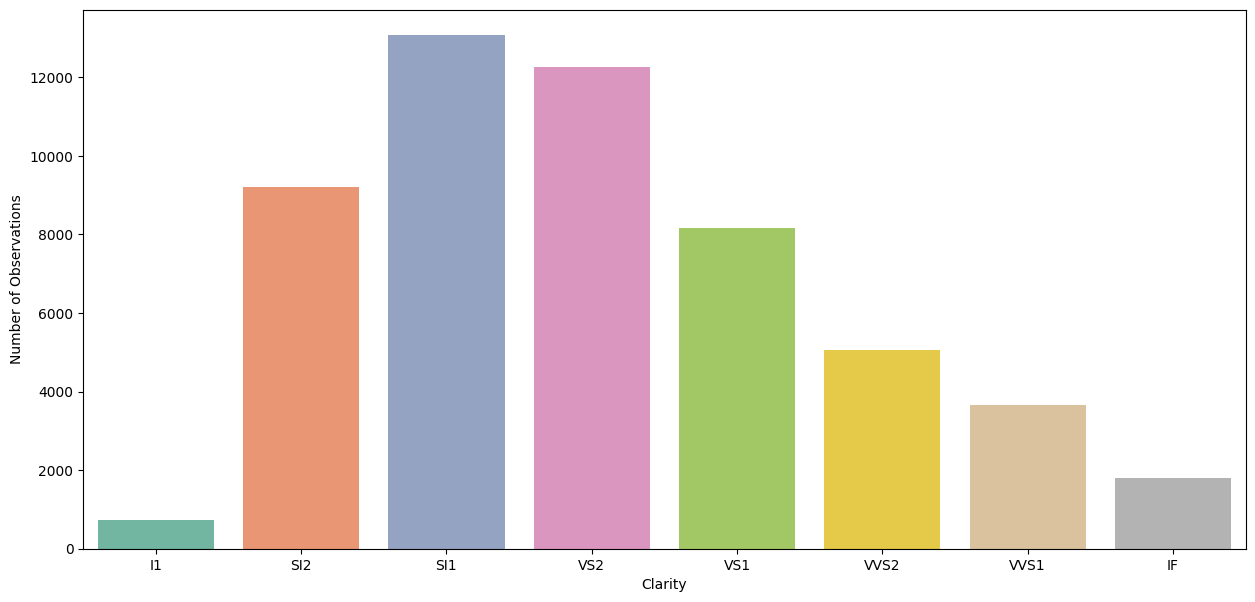

In [39]:
plt.figure(figsize= (15, 7))
sns.countplot(x= "clarity", data= df, order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], palette= "Set2")
plt.xlabel("Clarity")
plt.ylabel("Number of Observations")
plt.show()

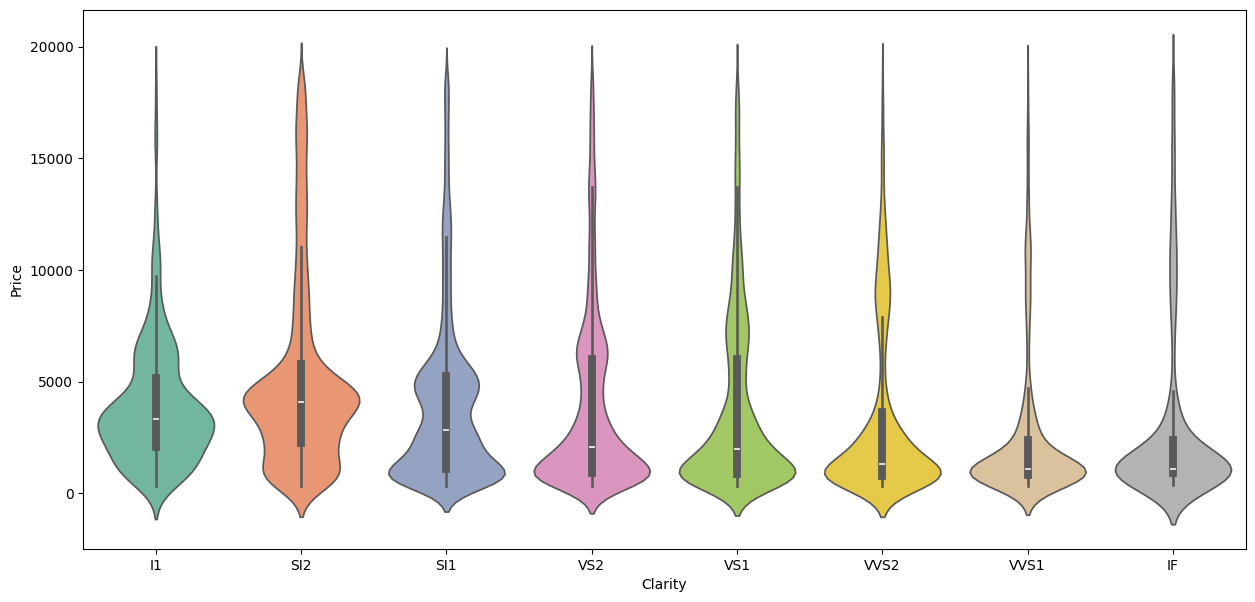

In [40]:
plt.figure(figsize= (15, 7))
sns.violinplot(x= "clarity", y= "price", data= df,
            order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], palette= "Set2")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()

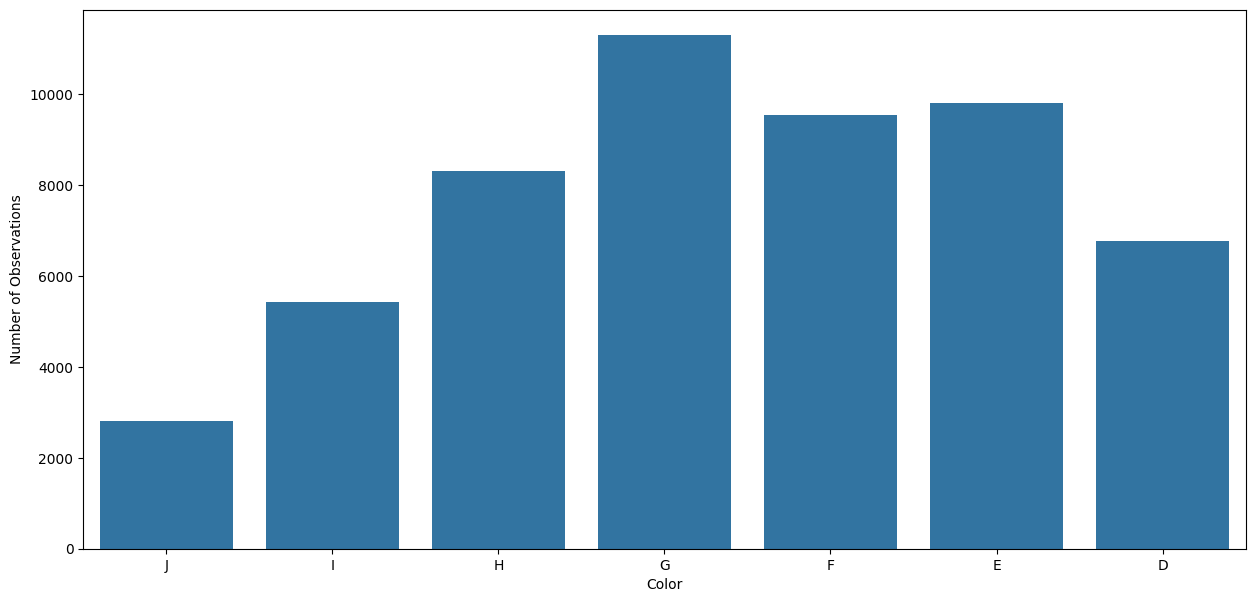

In [41]:
plt.figure(figsize= (15, 7))
sns.countplot(x= "color", data= df, order=["J", "I", "H", "G", "F", "E", "D"])
plt.xlabel("Color")
plt.ylabel("Number of Observations")
plt.show()

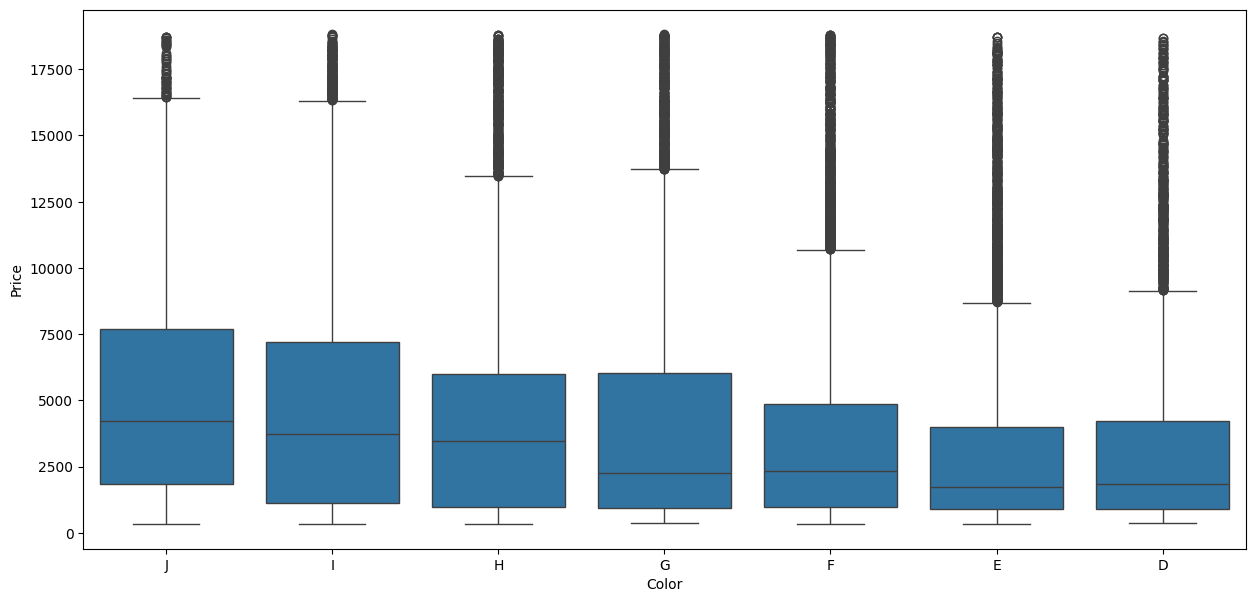

In [42]:
plt.figure(figsize= (15, 7))
sns.boxplot(x= "color", y= "price", data= df, order=["J", "I", "H", "G", "F", "E", "D"])
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()

<Axes: xlabel='carat', ylabel='price'>

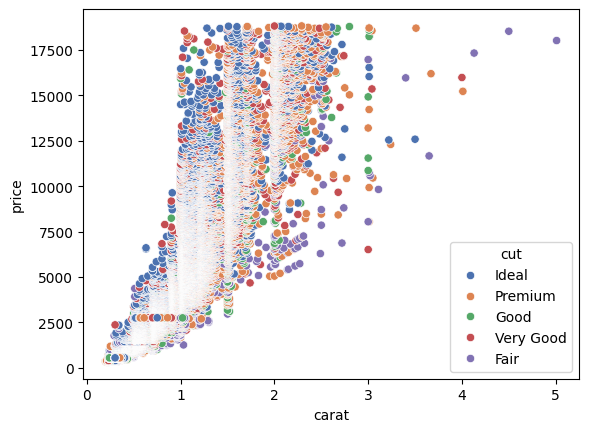

In [49]:
sns.scatterplot(data=df, x="carat", y="price", hue="cut", palette="deep")

<Axes: xlabel='color', ylabel='price'>

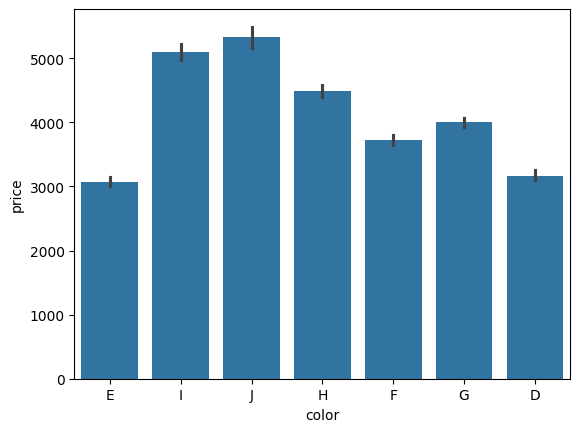

In [50]:
sns.barplot(data=df, x="color", y="price")

<Axes: xlabel='carat', ylabel='price'>

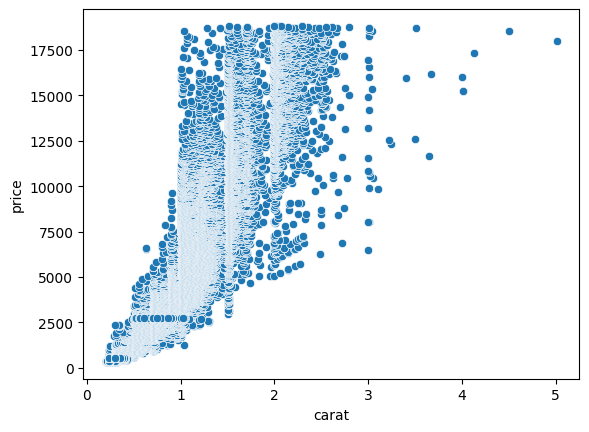

In [51]:
sns.scatterplot(data=df, x="carat", y="price")